# Student Performance

[Link Kaggle Dataset Student Performance:](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
# sns.set_palette("RdBu")

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load dataset
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


- The dataset has no missing values

In [4]:
#Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [5]:
df.describe(include="object").T

,count,unique,top,freq
Extracurricular Activities,10000,2,No,5052


## 2. Visualizations

### 2.1 Univariate Analysis

In [6]:
#define functions for visualizations
def countplot(column_name, rotation=0):
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column_name)
    plt.title(column_name)
    plt.xticks(rotation=rotation)
    plt.show()

def pieplot(column_name):
    plt.pie(x=df[column_name].value_counts(),
            labels=df[column_name].value_counts().index,
            autopct="%1.2f%%", shadow=True)
    plt.show()

def boxplot(column_name):
    fig,ax=plt.subplots(1,2,figsize=(15,4))
    sns.boxplot(data=df, x=column_name, ax=ax[0])
    sns.histplot(data=df, x=column_name, bins=4, ax=ax[1])
    ax[0].set_title(column_name)
    ax[1].set_title(column_name)
    plt.show()

### `Hours Studied`

In [7]:
df["Hours Studied"].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

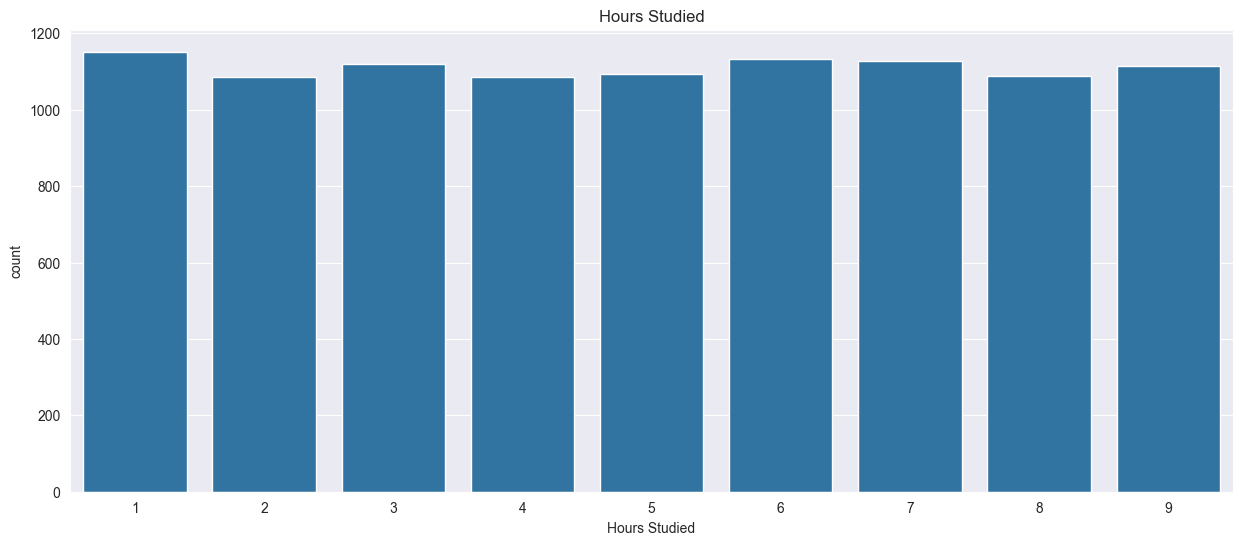

In [8]:
countplot("Hours Studied")

- As observed, there is no distinctive pattern in study hours. There is no greater number of students studying 9 hours compared to those studying just one hour. The distribution appears to be fairly uniform, without a clearly dominant range of study hours.

### `Previous Scores`

In [9]:
df["Previous Scores"].unique()

array([99, 82, 51, 52, 75, 78, 73, 45, 77, 89, 91, 79, 47, 72, 83, 54, 96,
       74, 85, 61, 62, 84, 94, 90, 44, 70, 67, 97, 59, 55, 68, 63, 46, 76,
       43, 81, 93, 98, 48, 92, 64, 88, 60, 87, 40, 69, 80, 95, 49, 50, 53,
       71, 56, 58, 66, 65, 57, 41, 42, 86], dtype=int64)

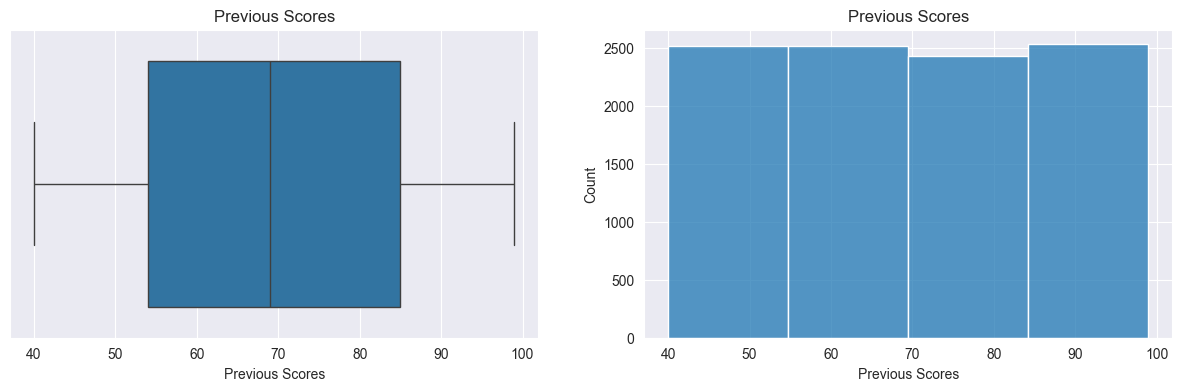

In [10]:
boxplot("Previous Scores")

- Average Previous Scores is 70 points with a minimum of 40 and a maximum of 100.

### `Extracurricular Activities`

In [11]:
df["Extracurricular Activities"].unique()

array(['Yes', 'No'], dtype=object)

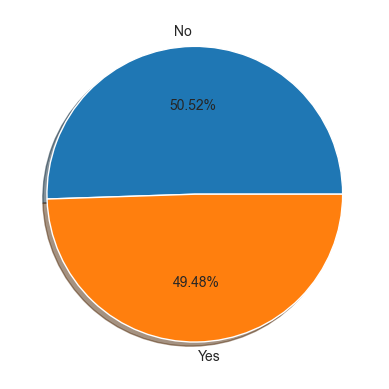

In [12]:
pieplot("Extracurricular Activities")

- Half of the students, specifically 50%, actively engage in extracurricular activities, while the remaining 50% of students do not partake in such activities.

### `Sleep Hours`

In [13]:
df["Sleep Hours"].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

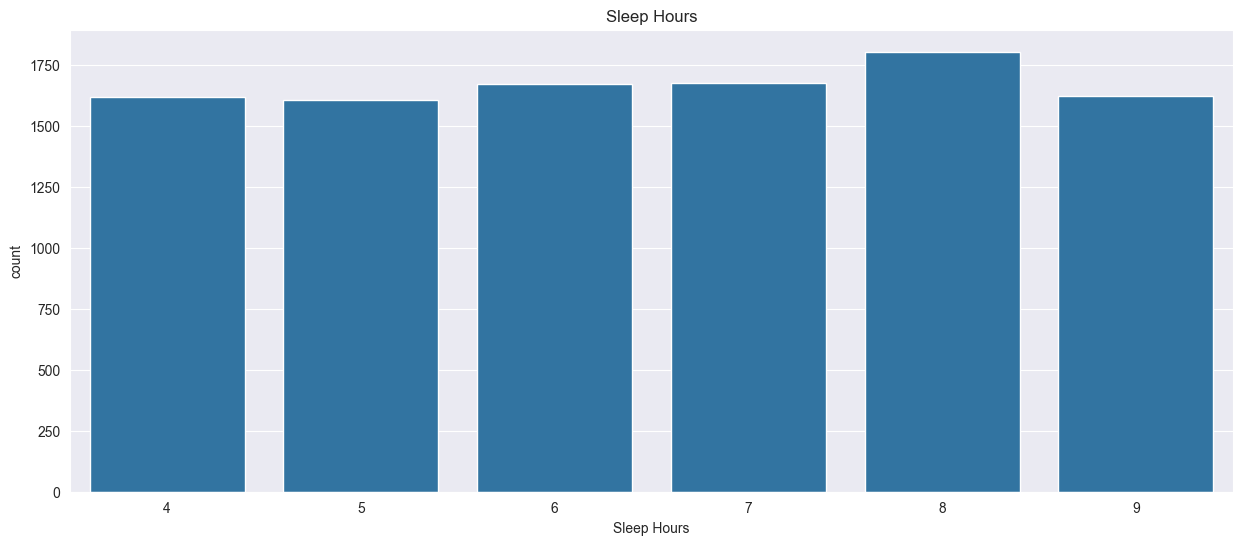

In [14]:
countplot("Sleep Hours")

- We also do not observe a significant difference; there are no significantly more students who sleep for 4, 5, or 6 hours compared to those who sleep for 7, 8, or 9 hours. The distribution of sleeping hours appears to be fairly balanced, with no distinct preference for a particular time range.

### 2.2 Multivariate Analysis

In [15]:
##define functions for visualizations
def count_plot(column_name, hue=None, rotation=0):
    plt.figure(figsize=(15,6))
    sns.countplot(data=df, x=column_name, hue=hue, dodge=True)
    plt.xticks(rotation=rotation)
    plt.title(f"{column_name}")
    plt.show()

def scatterplot(column_name_x, column_name_y, hue = None):
    plt.figure(figsize=(15,5))
    sns.scatterplot(data=df, x=column_name_x, y= column_name_y, hue=hue)
    plt.legend(loc="best")
    plt.title(f"{hue} by {column_name_x} and {column_name_y}")
    plt.show()

def boxplot(column_name_x, column_name_y, hue=None):
    plt.figure(figsize=(15,6))
    sns.boxplot(data=df, x=column_name_x, y=column_name_y, hue=hue)
    plt.title(f"Relationship between {column_name_x} and {column_name_y}")
    plt.show()

### `Hours Studied` by `Extracurricular Activities`

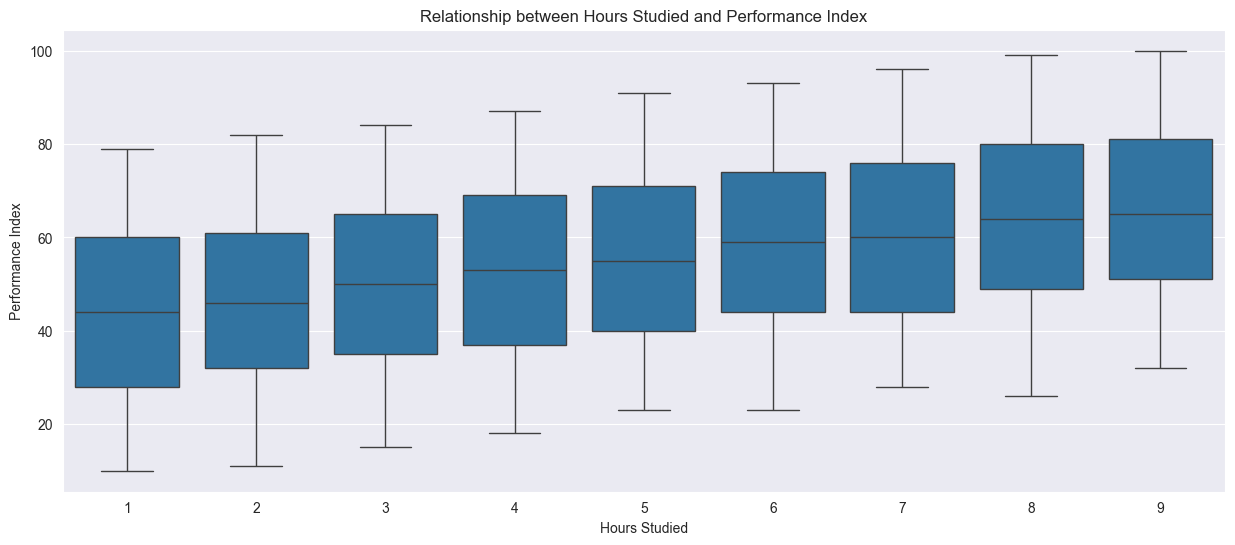

In [16]:
boxplot("Hours Studied", "Performance Index")

- We can observe significantly better performance as the student studies more hours.

### `Performance Index` by `Sleep Hours`

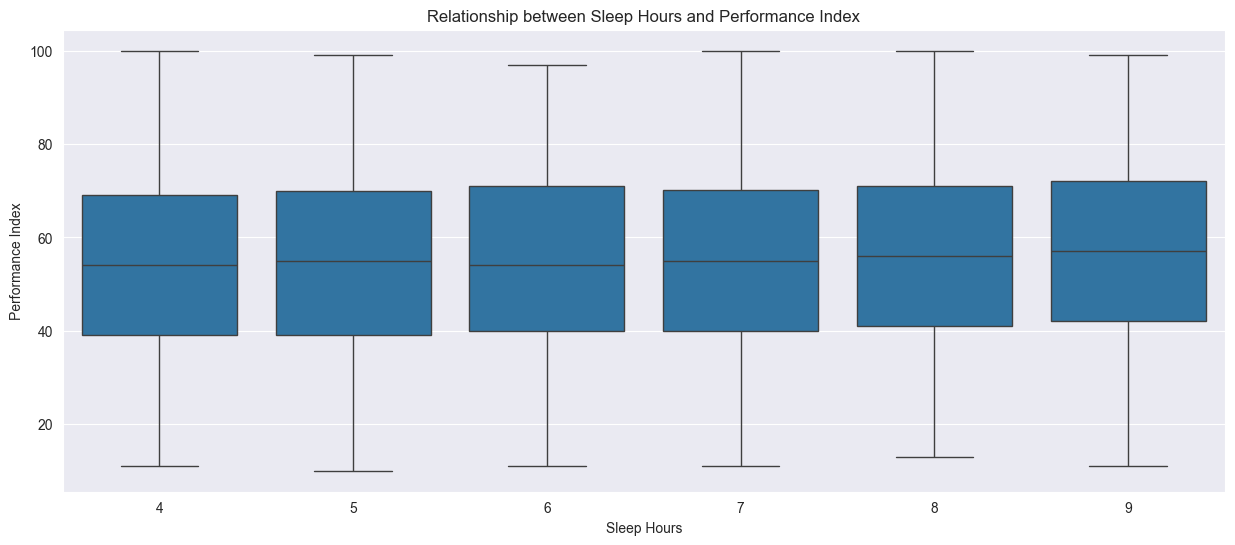

In [17]:
boxplot("Sleep Hours", "Performance Index")

- Increasing the number of sleep hours does not lead to an improvement in performance; everything remains very balanced.

### `Performace Index` by `Hours Studied` and `Extracurricular Activities`

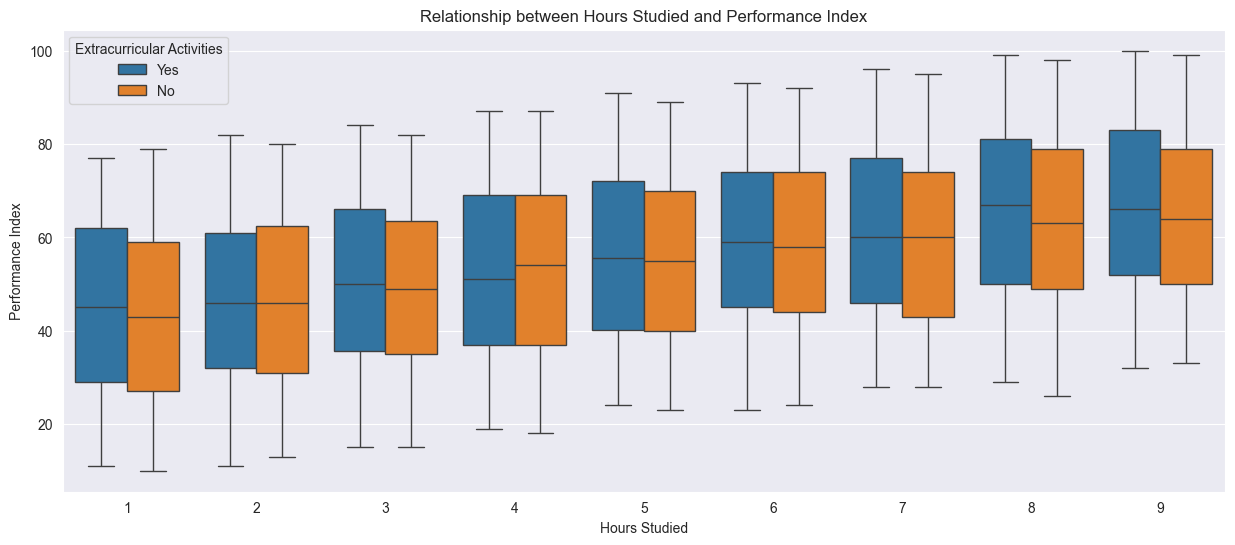

In [18]:
boxplot("Hours Studied", "Performance Index", "Extracurricular Activities")

- If indeed there is better performance with more study hours, the presence or absence of extracurricular activities does not significantly affect it.

### 2.3 Heatmap

<Axes: >

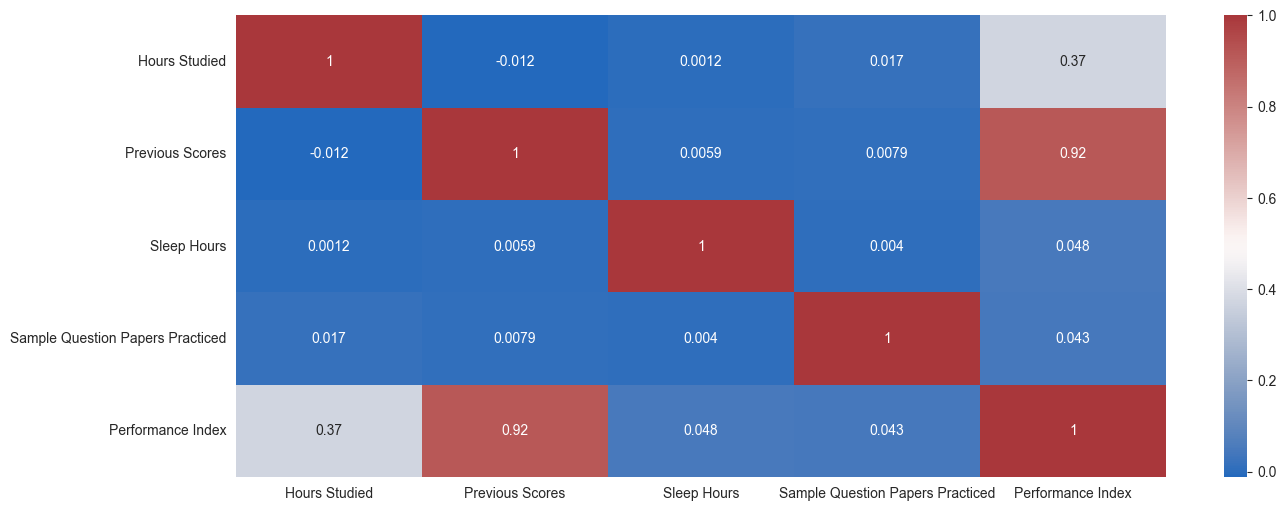

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(data=df.select_dtypes(exclude="object").corr(), annot=True, cmap="vlag")

## 3. Insights

- We can observe that the more study hours, the better the students performance.
- Sleep hours are not a factor influencing students' performance.
- Furthermore, the fact that students are involved in extracurricular activities does not significantly influence their performance.

## 4. Feature Engineering

In [20]:
#Import libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [21]:
#Split the data
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [22]:
#Encoding the data
le = LabelEncoder()
X["Extracurricular Activities"]=le.fit_transform(X["Extracurricular Activities"])

In [23]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [24]:
#Standardizing the data
var_to_stand=["Hours Studied", "Previous Scores", "Sleep Hours", "Sample Question Papers Practiced"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.25,
                                                    random_state=0)

sc = StandardScaler()

X_train[var_to_stand] = sc.fit_transform(X_train[var_to_stand])
X_test[var_to_stand] = sc.transform(X_test[var_to_stand])

## 5. Modeling

In [25]:
#Import libraries

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 5.1 Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
lr_y_pred = lr.predict(X_test) 

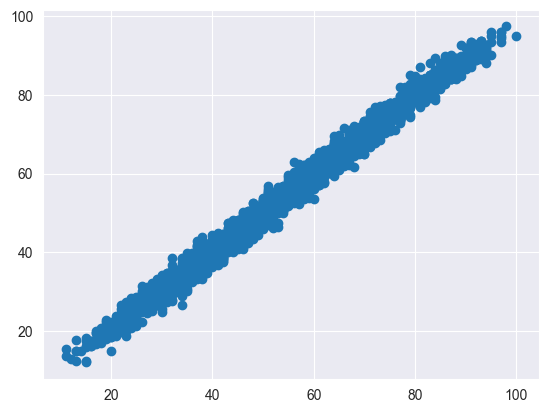

In [29]:
plt.scatter(y_test, lr_y_pred)

In [30]:
mse = mean_squared_error(y_test, lr_y_pred)
mae = mean_absolute_error(y_test, lr_y_pred)
r2 = r2_score(y_test, lr_y_pred)
print(f"MSE {mse:.3}")
print(f"MAE {mae:.3}")
print(f"R2 {r2:.3%}")

MSE 4.08
MAE 1.61
R2 98.847%


In [31]:
#Validating predictors
import statsmodels.api as sm

In [32]:
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.328e+05
Date:                Sun, 29 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:15:36   Log-Likelihood:                -16002.
No. Observations:                7500   AIC:                         3.202e+04
Df Residuals:                    7494   BIC:                         3.206e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               54.9183      0.033   1646.332      0.000      54.853      54.984
Hours Studied                        7.4014      0.024    313.513      0.000       7.355       7.448
Previous Scores                     17.7393      0.024    751.372      0.000      17.693      17.786
Extracurricular Activities           0.6590      0.047     13.954      0.000       0.566       0.752
Sleep Hours                          0.8110      0.024     34.346      0.000       0.765       0.857
Sample Question Papers Practiced     0.5424      0.024     22.976      0.000       0.496       0.589
==============================================================================
Omnibus:                        5.090   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                5.500
Skew:                           0.015   Prob(JB):                       0.0639
Kurtosis:                       3.129   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**All feature coefficients are statistically significant, indicating that all independent variables have a significant impact on the model. The model itself boasts an impressive coefficient of determination (R-squared) of 98.84%, suggesting it is highly effective at explaining variability in the 'Performance Index.' These results support the validity and robustness of the model.**